# TITRE

In [239]:
%pip install scikit-learn
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [240]:
import pandas as pd
def data_loader(csv_path):
    return pd.read_csv(csv_path)

## import employee_survey_data

In [241]:
employeeSurveyDf = data_loader(csv_path="./data/employee_survey_data.csv")
employeeSurveyDf

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
...,...,...,...,...
4405,4406,4.0,1.0,3.0
4406,4407,4.0,4.0,3.0
4407,4408,1.0,3.0,3.0
4408,4409,4.0,1.0,3.0


## import general_data

In [242]:
generalDf = data_loader(csv_path="./data/general_data.csv")
generalDf

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


## import manager_survey_data

In [243]:
managerSurveyDf = data_loader(csv_path="./data/manager_survey_data.csv")
managerSurveyDf

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3
...,...,...,...
4405,4406,3,3
4406,4407,2,3
4407,4408,3,4
4408,4409,2,3


## import in_time

In [244]:
inTimeDf = data_loader(csv_path="./data/in_time.csv")
inTimeDf.rename(columns={"Unnamed: 0": "EmployeeID"}, inplace=True)
inTimeDf

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,NaN,2015-01-02 09:20:32,2015-01-05 10:17:53,2015-01-06 10:26:51,2015-01-07 10:06:58,2015-01-08 09:45:06,2015-01-09 09:49:24,2015-01-12 09:37:10,2015-01-13 09:25:02,...,2015-12-18 10:01:06,2015-12-21 10:25:25,2015-12-22 10:16:11,2015-12-23 10:04:40,2015-12-24 09:45:40,NaN,2015-12-28 10:15:39,2015-12-29 10:10:09,2015-12-30 09:28:19,2015-12-31 10:00:12
4406,4407,NaN,2015-01-02 10:03:41,NaN,2015-01-06 09:44:00,2015-01-07 09:42:10,2015-01-08 10:00:57,2015-01-09 09:44:04,2015-01-12 10:07:32,2015-01-13 10:05:11,...,2015-12-18 09:27:32,2015-12-21 09:41:24,2015-12-22 09:50:30,2015-12-23 10:32:21,2015-12-24 09:47:41,NaN,2015-12-28 09:54:23,2015-12-29 10:13:32,2015-12-30 10:21:09,2015-12-31 10:09:48
4407,4408,NaN,2015-01-02 10:01:01,2015-01-05 09:33:00,2015-01-06 09:49:17,2015-01-07 10:28:12,2015-01-08 09:47:38,2015-01-09 10:01:03,2015-01-12 09:49:12,2015-01-13 09:47:10,...,2015-12-18 10:00:57,2015-12-21 09:51:07,2015-12-22 10:02:10,2015-12-23 09:58:29,2015-12-24 09:56:05,NaN,2015-12-28 09:59:24,NaN,2015-12-30 10:02:36,2015-12-31 10:03:30
4408,4409,NaN,2015-01-02 10:17:05,2015-01-05 10:02:27,2015-01-06 10:12:50,2015-01-07 10:12:31,2015-01-08 09:42:57,NaN,2015-01-12 10:00:38,2015-01-13 09:48:03,...,2015-12-18 09:54:33,2015-12-21 10:01:08,2015-12-22 10:10:19,2015-12-23 09:42:30,2015-12-24 09:56:05,NaN,2015-12-28 09:55:25,2015-12-29 09:54:42,2015-12-30 10:15:44,2015-12-31 09:56:47


## import out_time

In [245]:
outTimeDf = data_loader(csv_path="./data/out_time.csv")
outTimeDf.rename(columns={"Unnamed: 0": "EmployeeID"}, inplace=True)
outTimeDf

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,NaN,2015-01-02 17:27:37,2015-01-05 19:08:20,2015-01-06 18:50:49,2015-01-07 18:57:40,2015-01-08 17:58:31,2015-01-09 18:06:15,2015-01-12 17:58:48,2015-01-13 18:10:35,...,2015-12-18 18:06:05,2015-12-21 18:35:06,2015-12-22 18:33:44,2015-12-23 18:40:56,2015-12-24 18:21:29,NaN,2015-12-28 18:44:35,2015-12-29 19:14:38,2015-12-30 18:24:56,2015-12-31 18:30:41
4406,4407,NaN,2015-01-02 16:19:01,NaN,2015-01-06 15:07:37,2015-01-07 15:25:50,2015-01-08 16:12:33,2015-01-09 15:26:56,2015-01-12 16:10:42,2015-01-13 16:22:43,...,2015-12-18 15:23:02,2015-12-21 15:31:14,2015-12-22 15:45:59,2015-12-23 16:38:59,2015-12-24 15:47:15,NaN,2015-12-28 15:34:34,2015-12-29 16:47:02,2015-12-30 16:03:17,2015-12-31 16:18:39
4407,4408,NaN,2015-01-02 17:17:35,2015-01-05 17:08:07,2015-01-06 17:27:46,2015-01-07 18:27:22,2015-01-08 17:05:25,2015-01-09 17:02:57,2015-01-12 17:35:45,2015-01-13 17:15:52,...,2015-12-18 17:48:05,2015-12-21 17:43:05,2015-12-22 17:47:23,2015-12-23 17:43:37,2015-12-24 17:20:12,NaN,2015-12-28 17:43:28,NaN,2015-12-30 17:48:14,2015-12-31 18:08:55
4408,4409,NaN,2015-01-02 19:48:37,2015-01-05 19:37:40,2015-01-06 20:00:08,2015-01-07 19:35:59,2015-01-08 18:55:13,NaN,2015-01-12 19:18:17,2015-01-13 19:24:02,...,2015-12-18 19:52:44,2015-12-21 19:21:35,2015-12-22 19:32:40,2015-12-23 18:57:00,2015-12-24 19:37:57,NaN,2015-12-28 19:58:36,2015-12-29 18:55:26,2015-12-30 19:37:22,2015-12-31 19:33:45


## Merge all dataframes

In [246]:
mergedDataframe = pd.merge(employeeSurveyDf, generalDf, on='EmployeeID')
mergedDataframe = pd.merge(mergedDataframe, managerSurveyDf, on='EmployeeID')
mergedDataframe.head()


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,11,8,0,1.0,6,1,0,0,3,3
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,23,8,1,6.0,3,5,1,4,2,4
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,15,8,3,5.0,2,5,0,3,3,3
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,...,11,8,3,13.0,5,8,7,5,2,3
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,...,12,8,2,9.0,2,6,0,4,3,3


In [247]:
mergedDataframe.info()
mergedDataframe.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
 4   Age                      4410 non-null   int64  
 5   Attrition                4410 non-null   object 
 6   BusinessTravel           4410 non-null   object 
 7   Department               4410 non-null   object 
 8   DistanceFromHome         4410 non-null   int64  
 9   Education                4410 non-null   int64  
 10  EducationField           4410 non-null   object 
 11  EmployeeCount            4410 non-null   int64  
 12  Gender                   4410 non-null   object 
 13  JobLevel                 4410 non-null   int64  
 14  JobRole                 

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,...,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
count,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,...,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,2205.500000,2.723603,2.728246,2.761436,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,...,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2.729932,3.153741
std,1273.201673,1.092756,1.101253,0.706245,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,...,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,0.711400,0.360742
min,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,...,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
25%,1103.250000,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,...,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000
50%,2205.500000,3.000000,3.000000,3.000000,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,...,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000
75%,3307.750000,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,...,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000
max,4410.000000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,...,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000


Hist

## Removing useless cols

In [248]:
mergedDataframe.drop(['EmployeeCount'], axis=1, inplace=True)
mergedDataframe.drop(['Over18'], axis=1, inplace=True)
mergedDataframe.drop(['StandardHours'], axis=1, inplace=True)
mergedDataframe.drop(['EmployeeID'], axis=1, inplace=True)
mergedDataframe.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,...,1.0,11,0,1.0,6,1,0,0,3,3
1,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,...,0.0,23,1,6.0,3,5,1,4,2,4
2,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,...,1.0,15,3,5.0,2,5,0,3,3,3
3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,...,3.0,11,3,13.0,5,8,7,5,2,3
4,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,...,4.0,12,2,9.0,2,6,0,4,3,3


# Remapping the data

In [249]:
# remplacement des strings par des entiers
mergedDataframe['Attrition'] = mergedDataframe['Attrition'].map({'Yes': 1, 'No': 0})
""" mergedDataframe['BusinessTravel'] = mergedDataframe['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})
mergedDataframe['Department'] = mergedDataframe['Department'].map({'Sales': 0, 'Research & Development': 1, 'Human Resources': 2})
mergedDataframe['EducationField'] = mergedDataframe['EducationField'].map({'Life Sciences': 0, 'Medical': 1, 'Marketing': 2, 'Technical Degree': 3, 'Human Resources': 4, 'Other': 5})
mergedDataframe['Gender'] = mergedDataframe['Gender'].map({'Female': 0, 'Male': 1})
mergedDataframe['JobRole'] = mergedDataframe['JobRole'].map({'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2, 'Manufacturing Director': 3, 'Healthcare Representative': 4, 'Manager': 5, 'Sales Representative': 6, 'Research Director': 7, 'Human Resources': 8})
mergedDataframe['MaritalStatus'] = mergedDataframe['MaritalStatus'].map({'Single': 0, 'Married': 1, 'Divorced': 2}) """


mergedDataframe['BusinessTravel'] = mergedDataframe['BusinessTravel'].astype('category').cat.codes
mergedDataframe['Department'] = mergedDataframe['Department'].astype('category').cat.codes
mergedDataframe['EducationField'] = mergedDataframe['EducationField'].astype('category').cat.codes
mergedDataframe['Gender'] = mergedDataframe['Gender'].astype('category').cat.codes
mergedDataframe['JobRole'] = mergedDataframe['JobRole'].astype('category').cat.codes
mergedDataframe['MaritalStatus'] = mergedDataframe['MaritalStatus'].astype('category').cat.codes

# regrouper par classe d'age en 6 groupes de 18 à 60 ans
mergedDataframe['Age'] = pd.cut(mergedDataframe['Age'], bins=[18, 24, 31, 38, 45, 52, 60], labels=[0, 1, 2, 3, 4, 5])

# regrouper par classe de salaire en 6 groupes de 0 à 200000
mergedDataframe['MonthlyIncome'] = pd.cut(mergedDataframe['MonthlyIncome'], bins=[0, 33333, 66666, 100000, 133333, 166666, 200000], labels=[0, 1, 2, 3, 4, 5])

# regrouper par classe de distance en 6 groupes de 0 à 30
mergedDataframe['DistanceFromHome'] = pd.cut(mergedDataframe['DistanceFromHome'], bins=[0, 5, 10, 15, 20, 25, 30], labels=[0, 1, 2, 3, 4, 5])

# regrouper par classe de nombre d'années passées dans l'entreprise en 6 groupes de 0 à 40
mergedDataframe['YearsAtCompany'] = pd.cut(mergedDataframe['YearsAtCompany'], bins=[0, 6, 13,19,25,33,40], labels=[0, 1, 2, 3, 4, 5])

# regrouper par pourcentage d'augmentation de salaire en 3 groupes de 10 à 25
mergedDataframe['PercentSalaryHike'] = pd.cut(mergedDataframe['PercentSalaryHike'], bins=[10, 15, 20, 25], labels=[0, 1, 2])

# regrouper par année total passées dans ce type de poste en 6 groupes de 0 à 40
mergedDataframe['TotalWorkingYears'] = pd.cut(mergedDataframe['TotalWorkingYears'], bins=[0, 6, 13,19,25,33,40], labels=[0, 1, 2, 3, 4, 5])

mergedDataframe.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,3.0,4.0,2.0,4,0,2,2,1,2,1,...,1.0,0,0,0,6,0,0,0,3,3
1,3.0,2.0,4.0,1,1,1,1,1,1,1,...,0.0,2,1,0,3,0,1,4,2,4
2,2.0,2.0,1.0,2,0,1,1,3,4,4,...,1.0,0,3,0,2,0,0,3,3,3
3,4.0,4.0,3.0,2,0,0,1,0,5,1,...,3.0,0,3,1,5,1,7,5,2,3
4,4.0,1.0,3.0,2,0,2,1,1,1,3,...,4.0,0,2,1,2,0,0,4,3,3


# Dendrogram

In [250]:
from scipy.cluster.hierarchy import dendrogram, linkage
# dendroDF = mergedDataframe.copy()
# dendroDF['Attrition'] = dendroDF['Attrition'].map({'Yes': 1, 'No': 0})
# dendroDF.drop(['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus'], axis=1, inplace=True)

# median = dendroDF["EnvironmentSatisfaction"].median()
# dendroDF["EnvironmentSatisfaction"].fillna(median, inplace=True)

# median = dendroDF["JobSatisfaction"].median()
# dendroDF["JobSatisfaction"].fillna(median, inplace=True)

# median = dendroDF["WorkLifeBalance"].median()
# dendroDF["WorkLifeBalance"].fillna(median, inplace=True)

# median = dendroDF["NumCompaniesWorked"].median()
# dendroDF["NumCompaniesWorked"].fillna(median, inplace=True)

# median = dendroDF["TotalWorkingYears"].median()
# dendroDF["TotalWorkingYears"].fillna(median, inplace=True)

# dendroDF.info()
# dendrogram(linkage(dendroDF, method='ward'), orientation='top', distance_sort='descending', show_leaf_counts=True)


In [251]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming mergedDataframe is already defined earlier in your code

""" for category in mergedDataframe.columns:
    # Getting counts for both attrition and non-attrition by the current category
    attrition_counts = mergedDataframe.groupby([category, 'Attrition']).size().unstack(fill_value=0)

    # Calculate percentages
    total = attrition_counts.sum(axis=1) # Total counts (attrition + non-attrition) for each category
    percentages = attrition_counts.div(total, axis=0) * 100 # Calculate the percentages
    
    # Plotting
    ax = percentages.plot(kind='bar', figsize=(10, 6), title=f'Percentage of Attrition and Non-Attrition by {category}', stacked=False)
    
    plt.xlabel(category)
    plt.ylabel('Percentage')
    
    # Annotate each bar with its percentage value for both Attrition and Non-Attrition
    for p in ax.patches:
        annotation = "{:.1f}%".format(p.get_height())
        ax.annotate(annotation, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

    plt.ylim(0, 100)  # Adjust the y-axis to show percentages clearly
    plt.show()
     """

' for category in mergedDataframe.columns:\n    # Getting counts for both attrition and non-attrition by the current category\n    attrition_counts = mergedDataframe.groupby([category, \'Attrition\']).size().unstack(fill_value=0)\n\n    # Calculate percentages\n    total = attrition_counts.sum(axis=1) # Total counts (attrition + non-attrition) for each category\n    percentages = attrition_counts.div(total, axis=0) * 100 # Calculate the percentages\n    \n    # Plotting\n    ax = percentages.plot(kind=\'bar\', figsize=(10, 6), title=f\'Percentage of Attrition and Non-Attrition by {category}\', stacked=False)\n    \n    plt.xlabel(category)\n    plt.ylabel(\'Percentage\')\n    \n    # Annotate each bar with its percentage value for both Attrition and Non-Attrition\n    for p in ax.patches:\n        annotation = "{:.1f}%".format(p.get_height())\n        ax.annotate(annotation, (p.get_x() + p.get_width() / 2., p.get_height()), ha=\'center\', va=\'bottom\')\n\n    plt.ylim(0, 100)  # Adjus

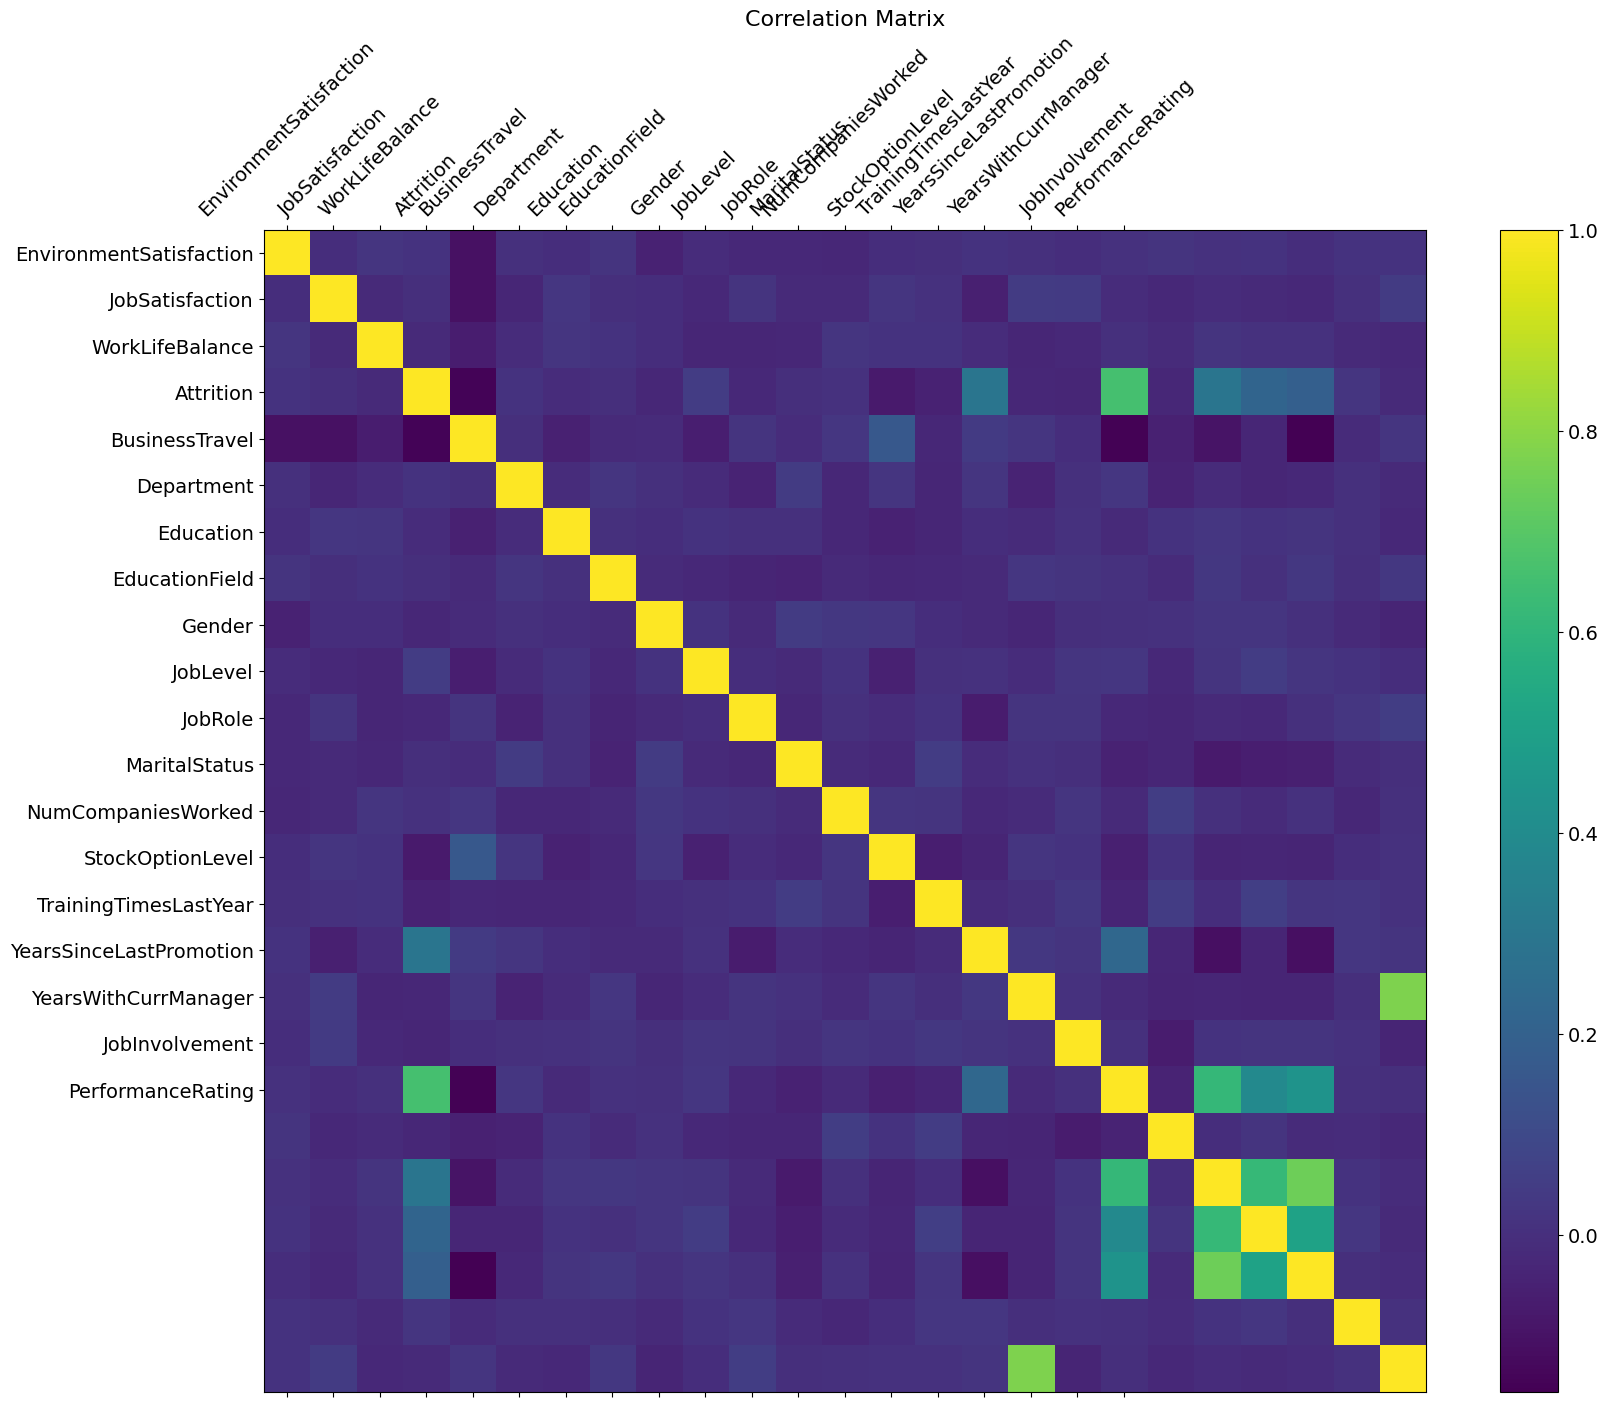

In [261]:
# Calculate the correlation matrix

corr = mergedDataframe.corr()

f = plt.figure(figsize=(19, 15))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(mergedDataframe.select_dtypes(['number']).shape[1]), mergedDataframe.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(mergedDataframe.select_dtypes(['number']).shape[1]), mergedDataframe.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.savefig('correlation_matrix.png')


In [253]:
temp = corr[(corr>0.5)&(corr!=1)].abs().max()
print(temp[~temp.isna()])
# Suprimmer total working years car corrélé avec age et years at company
# 

Age                        0.660001
PercentSalaryHike          0.776457
TotalWorkingYears          0.660001
YearsAtCompany             0.742790
YearsSinceLastPromotion    0.616131
YearsWithCurrManager       0.742790
PerformanceRating          0.776457
dtype: float64


In [197]:
# This code shows the process of imputing missing values in the numeric columns. It will be implemented in the transformation pipeline later.

from sklearn.impute import SimpleImputer

# Create an instance of the SimpleImputer class
imputer = SimpleImputer(strategy='median')

# Fit the imputer to the numeric columns
num_data = mergedDataframe.select_dtypes(include=np.number)
imputer.fit(num_data)

# Transform and replace the numeric columns
num_data_trans = imputer.transform(num_data)
df_num_trans = pd.DataFrame(data=num_data_trans, columns=num_data.columns)
#print(df_num_trans)

df_cat_data = mergedDataframe.drop(num_data.columns, axis=1)
#print(df_cat_data)

df_corrected = pd.concat([df_num_trans, df_cat_data], axis=1)

df_corrected


,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Attrition,Education,JobLevel,NumCompaniesWorked,StockOptionLevel,TrainingTimesLastYear,YearsSinceLastPromotion,...,Department,DistanceFromHome,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany
0,3.0,4.0,2.0,0.0,2.0,1.0,1.0,0.0,6.0,0.0,...,Sales,1,Life Sciences,Female,Healthcare Representative,Married,3,0,0,0
1,3.0,2.0,4.0,1.0,1.0,1.0,0.0,1.0,3.0,1.0,...,Research & Development,1,Life Sciences,Female,Research Scientist,Single,1,2,0,0
2,2.0,2.0,1.0,0.0,4.0,4.0,1.0,3.0,2.0,0.0,...,Research & Development,3,Other,Male,Sales Executive,Married,5,0,0,0
3,4.0,4.0,3.0,0.0,5.0,3.0,3.0,3.0,5.0,7.0,...,Research & Development,0,Life Sciences,Male,Human Resources,Married,2,0,1,1
4,4.0,1.0,3.0,0.0,1.0,1.0,4.0,2.0,2.0,0.0,...,Research & Development,1,Medical,Male,Sales Executive,Single,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4.0,1.0,3.0,0.0,4.0,1.0,3.0,1.0,5.0,0.0,...,Research & Development,0,Medical,Female,Research Scientist,Single,1,1,1,0
4406,4.0,4.0,3.0,0.0,4.0,1.0,2.0,0.0,2.0,0.0,...,Research & Development,0,Medical,Male,Laboratory Technician,Divorced,0,0,1,0
4407,1.0,3.0,3.0,0.0,2.0,2.0,0.0,0.0,4.0,1.0,...,Research & Development,4,Life Sciences,Male,Sales Executive,Married,1,1,0,0
4408,4.0,1.0,3.0,0.0,2.0,1.0,0.0,1.0,2.0,7.0,...,Sales,3,Medical,Male,Laboratory Technician,Divorced,0,0,1,1


In [198]:
# Splitting the data into training and testing sets

from sklearn.model_selection import StratifiedShuffleSplit

# Stratified sampling based on the 'WorkLifeBalance' column
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_corrected, df_corrected['WorkLifeBalance']):
    print(train_index, test_index)
    df_train_set = df_corrected.loc[train_index]
    df_test_set = df_corrected.loc[test_index]


[3653  124 4383 ...  891   24 2283] [3751 3478 2266  262 1674 2410 4356 2823  387 1553 2481 2278 3253   90
 1623  663 4402 2123 3869 4149  537 3370 2734 4218 3760 3777 1194 3504
 3428 3035 2025 4119 1759 2716 3291 1607  739 3321  469 3501 1317  492
 3846 1302  844 3626  125 2477 3438 1843 1570    7 2268 1710 4069  260
 2547 3116 1527 1128 1956 2327  777 2565 4247 2127  859 3703 2483 1928
 2390 3830 2157 1007 1503  234  181  372 3987 1971 1608  331 3823 2720
 3182 3103 2870 3072 1500 2146 1360 2015  241  127  162 1609 4175 2537
 3423 2290 3169  351  690 2673 1797  862 4391 1245 1604 4404 4250  955
 2294 1529 4108  806 2835  649  196 4114 3677 2635 1345 3130 2971  907
 2617  771  529 1976  441 4253 3301 2307 2095 3274  575   62 1935 3399
  584  642  572 3261 3166 1293 1466 1272 2878  731  349 3655 3537 3113
 3333  202 1563 2239 2093 2462 1201 1904 2341  498 3791 1454 1968 4203
 3184 2772 1365 2359 3709 1464 2179  664 2067  157 4240 2768   40  790
  225 2020 3897   63 2542 1846 3605 4057 

In [199]:
X_train = df_train_set.drop(['Attrition'], axis=1)
y_train = df_train_set['Attrition'].copy()
X_test = df_test_set.drop(['Attrition'], axis=1)
y_test = df_test_set['Attrition'].copy()

In [200]:
# Numerical Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [201]:
# Categorical Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = X_train.select_dtypes(include=np.number).columns
cat_attribs = X_train.select_dtypes(include='object').columns

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

# Dataframe prepared with the full pipeline, ready for the model
X_train_prepared = full_pipeline.fit_transform(X_train)

In [202]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

# Random Forest model
forest_clf = RandomForestClassifier(random_state=42, n_estimators=10)

#Cross-Validation
forest_scores = cross_val_predict(forest_clf, X_train_prepared, y_train, cv=10)


In [203]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, forest_scores)

array([[2956,    3],
       [  66,  503]], dtype=int64)

In [204]:
# Precision and Recall

from sklearn.metrics import precision_score, recall_score

forest_precision = precision_score(y_train, forest_scores)
forest_recall = recall_score(y_train, forest_scores)

print(f'Precision: {forest_precision}')
print(f'Recall: {forest_recall}')

Precision: 0.9940711462450593
Recall: 0.8840070298769771


In [205]:
# F1 Score

from sklearn.metrics import f1_score

forest_f1 = f1_score(y_train, forest_scores)

print(f'F1 Score: {forest_f1}')

F1 Score: 0.935813953488372
